# 데이터셋 - 시가총액 데이터셋 튜토리얼

<img width="80%" border="2" src="https://i.imgur.com/NeFOe4Y.png" >

* 한국거래소(KRX)에서 일자별 시가총액 순위 데이터
* 1995-05-02~2019-04-30 (24년간), 1천만건 (CSV)

#### 2018-2019 [FinanceData.KR]()

## 시가총액(marcap) 데이터셋의 구성

시가총액(marcap) 데이터셋은 1995-05-02 ~ 2019-11-40일까지 24년간 일자별, 17개 컬럼, 1천만건 데이터 입니다.
압축하지 않은 상태에서  `1.3G` 분량 입니다.

https://github.com/FinanceData/marcap

* 컬럼: 17개
* 건수: 10,810,340 건(row)
* 크기: 1.3G


#### 컬럼 구성 
Date (날짜)를 인덱스(DatetimeIndex)로 포함하고 있으며, 컬럼 구성은 다음과 같습니다.

* Date : 날짜 (DatetimeIndex)
* Code : 종목코드
* Name : 종명이름 
* Open : 시가
* High : 고가
* Low : 저가
* Close : 종가
* Volume : 거래량
* Amount : 거래대금
* Changes : 전일대비
* ChagesRatio : 전일비
* Marcap : 시가총액(백만원)
* Stocks : 상장주식수
* MarcapRatio : 시가총액비중(%)
* ForeignShares : 외국인 보유주식수
* ForeignRatio : 외국인 지분율(%)
* Rank: 시가총액 순위 (당일)

## 시가총액 데이터셋(marcap) 가져오기
다음과 같이 단 한 줄의 명령으로 데이터를 가져올 수 있습니다.

git 명령으로 깃허브의 저장소를 복제(clone)합니다. 데이터와 데이터를 읽는데 도움이 되는 간단한 파이썬 유틸리티 함수가 포함되어 있습니다.
 

In [4]:
! git clone "https://github.com/FinanceData/marcap.git" marcap

fatal: 대상 경로가('marcap') 이미 있고 빈 디렉터리가 아닙니다.


#### 참고 (윈도우+아나콘다를 사용하는 경우):<br>
git 이 설치되어 있지 않다면,  다음과 같이 `아나콘다 프롬프트`에서 간단하게 git을 설치할 수 있습니다.

```bash
C:\Users\plusjune>conda install git
```



## 데이터 파일 구성 살펴보기

데이터는 ./marcap/data 디렉토리에 있으며 년도별 CSV 파일로 구성되어 있습니다. 개별 파일은 .gz으로 압축되어 있습니다.

In [5]:
!ls -lh marcap/data

합계 490M
-rw-r--r-- 1 plusjune plusjune 6.9M 12월  4 14:07 marcap-1995.csv.gz
-rw-r--r-- 1 plusjune plusjune  13M 12월  4 14:07 marcap-1996.csv.gz
-rw-r--r-- 1 plusjune plusjune  14M 12월  4 14:07 marcap-1997.csv.gz
-rw-r--r-- 1 plusjune plusjune  14M 12월  4 14:07 marcap-1998.csv.gz
-rw-r--r-- 1 plusjune plusjune  13M 12월  4 14:07 marcap-1999.csv.gz
-rw-r--r-- 1 plusjune plusjune  16M 12월  4 14:07 marcap-2000.csv.gz
-rw-r--r-- 1 plusjune plusjune  17M 12월  4 14:07 marcap-2001.csv.gz
-rw-r--r-- 1 plusjune plusjune  19M 12월  4 14:07 marcap-2002.csv.gz
-rw-r--r-- 1 plusjune plusjune  19M 12월  4 14:07 marcap-2003.csv.gz
-rw-r--r-- 1 plusjune plusjune  19M 12월  4 14:07 marcap-2004.csv.gz
-rw-r--r-- 1 plusjune plusjune  20M 12월  4 14:07 marcap-2005.csv.gz
-rw-r--r-- 1 plusjune plusjune  21M 12월  4 14:07 marcap-2006.csv.gz
-rw-r--r-- 1 plusjune plusjune  22M 12월  4 14:07 marcap-2007.csv.gz
-rw-r--r-- 1 plusjune plusjune  23M 12월  4 14:07 marcap-2008.csv.gz
-rw-r--r-- 1 plusjune plusjune  24M 12월 

##  1년치 데이터 읽어오기

pandas에서 CSV 파일을 직접 지정하여 1년치 데이터를 한번에 읽어 올 수 있습니다.

`Code`(종목코드)는 숫자로만 구성되어 있고 0으로 시작할 수 있으므로 명시적으로 str 타입으로 지정해 주는 것이 좋습니다. 또한, `Date`(날짜)는 날짜시간 타입으로 파싱하도록 지정합니다. 

In [6]:
# 2019년 데이터 CSV 읽기
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2018.csv.gz', dtype={'Code':str}, parse_dates=['Date'])
df.head(10)

Code      Name    Close  Changes  ChagesRatio   Volume        Amount  \
0  005930      삼성전자  2551000     3000          0.1   169485  432677351468   
1  000660    SK하이닉스    76600      100          0.1  2014838  154679174100   
2  005935     삼성전자우  2097000     7000          0.3    21940   45532420000   
3  005380       현대차   149500    -6500         -4.2   731763  110423755000   
4  005490     POSCO   339000     6500          2.0   153013   51616111000   
5  035420     NAVER   885000    15000          1.7    93587   82418272700   
6  051910      LG화학   411000     6000          1.5   153739   63093271500   
7  068270      셀트리온   225900     4800          2.2  1176443  264647210100   
8  105560      KB금융    63100     -300         -0.5   576658   36400428500   
9  207940  삼성바이오로직스   389500    18500          5.0   409343  156425815500   

      Open     High      Low           Marcap  MarcapRatio     Stocks  \
0  2569000  2570000  2539000  329330258194000        17.27  129098494   
1    77300    77300    76200   55764981159000         2.92  728002365   
2  2096000  2097000  2058000   38271466260000         2.01   18250580   
3   150500   153000   149000   32931333610500         1.73  220276479   
4   335000   341000   332500   29556337065000         1.55   87186835   
5   871000   885000   870000   29171970915000         1.53   32962679   
6   407000   415000   406500   29013452973000         1.52   70592343   
7   223600   227700   222200   27710345181600         1.45  122666424   
8    63900    63900    62400   26382837984700         1.38  418111537   
9   367000   391000   367000   25771267500000         1.35   66165000   

   ForeignShares  ForeignRatio  Rank       Date  
0     68095088.0         52.75     1 2018-01-02  
1    346184551.0         47.55     2 2018-01-02  
2     15021675.0         82.31     3 2018-01-02  
3     99484123.0         45.16     4 2018-01-02  
4     48888696.0         56.07     5 2018-01-02  
5     19676814.0         59.69     6 2018-01-02  
6     28525506.0         40.41     7 2018-01-02  
7     33333017.0         27.17     8 2018-01-02  
8    290095605.0         69.38     9 2018-01-02  
9      5676091.0          8.58    10 2018-01-02

2019년 1년치 데이터의 전체 건수는 다음과 같습니다

In [7]:
len(df)

567521

## 유틸리티 함수

marcap 시가총액 데이터셋에는 데이터를 날짜별로 혹은 기간과 특정 종목을 지정하여 손쉽게 읽기 위한 유틸함수가 있습니다. <br>

### marcap_data(start, end=None, code=None)
지정한 기간 데이터 읽어옵니다. 종목코드(code)를 지정하면 해당 종목에 대한 데이터를 지정한 기간만큼 읽어 옵니다. 거래량(volume)이 0인 행(row)는 제거하고 반환합니다.

다음과 같이 import 하여 사용합니다.



In [8]:
from marcap import marcap_data

### 특정 날짜를 지정하여 읽기

In [9]:
df = marcap_data('2019-5-2')
len(df)

2275

In [10]:
df.head()

Code    Name      Open      High       Low     Close     Volume  \
Date                                                                            
2019-05-02  005930    삼성전자   45500.0   46150.0   45400.0   45900.0  8625126.0   
2019-05-02  000660  SK하이닉스   79700.0   81200.0   79100.0   80700.0  3092434.0   
2019-05-02  005935   삼성전자우   36900.0   37350.0   36850.0   37200.0  1031686.0   
2019-05-02  005380     현대차  138000.0  140500.0  137000.0  138500.0   430420.0   
2019-05-02  068270    셀트리온  212000.0  212000.0  207000.0  207000.0   468421.0   

                  Amount  Changes  ChagesRatio        Marcap        Stocks  \
Date                                                                         
2019-05-02  3.954535e+11     50.0          0.1  2.740130e+14  5.969783e+09   
2019-05-02  2.492735e+11   1700.0          2.2  5.874979e+13  7.280024e+08   
2019-05-02  3.829733e+10      0.0          0.0  3.061139e+13  8.228867e+08   
2019-05-02  5.989262e+10      0.0          0.0  2.959304e+13  2.136682e+08   
2019-05-02  9.764316e+10  -5000.0         -2.4  2.648637e+13  1.279535e+08   

            MarcapRatio  ForeignShares  ForeignRatio  Rank  
Date                                                        
2019-05-02        15.79   3.420571e+09         57.30   1.0  
2019-05-02         3.39   3.748229e+08         51.49   2.0  
2019-05-02         1.76   7.629908e+08         92.72   3.0  
2019-05-02         1.71   9.577560e+07         44.82   4.0  
2019-05-02         1.53   2.591027e+07         20.25   5.0

### 기간을 지정하여 읽기 (2018년 1년간 전종목)

In [11]:
df = marcap_data('2018-01-01', '2018-12-31')
len(df)

550675

In [12]:
df.head()

Code    Name      Close  Changes  ChagesRatio     Volume  \
Date                                                                     
2018-01-02  005930    삼성전자  2551000.0   3000.0          0.1   169485.0   
2018-01-02  000660  SK하이닉스    76600.0    100.0          0.1  2014838.0   
2018-01-02  005935   삼성전자우  2097000.0   7000.0          0.3    21940.0   
2018-01-02  005380     현대차   149500.0  -6500.0         -4.2   731763.0   
2018-01-02  005490   POSCO   339000.0   6500.0          2.0   153013.0   

                  Amount       Open       High        Low        Marcap  \
Date                                                                      
2018-01-02  4.326774e+11  2569000.0  2570000.0  2539000.0  3.293303e+14   
2018-01-02  1.546792e+11    77300.0    77300.0    76200.0  5.576498e+13   
2018-01-02  4.553242e+10  2096000.0  2097000.0  2058000.0  3.827147e+13   
2018-01-02  1.104238e+11   150500.0   153000.0   149000.0  3.293133e+13   
2018-01-02  5.161611e+10   335000.0   341000.0   332500.0  2.955634e+13   

            MarcapRatio       Stocks  ForeignShares  ForeignRatio  Rank  
Date                                                                     
2018-01-02        17.27  129098494.0     68095088.0         52.75   1.0  
2018-01-02         2.92  728002365.0    346184551.0         47.55   2.0  
2018-01-02         2.01   18250580.0     15021675.0         82.31   3.0  
2018-01-02         1.73  220276479.0     99484123.0         45.16   4.0  
2018-01-02         1.55   87186835.0     48888696.0         56.07   5.0

### 기간을 지정하여, 특정 종목 읽기 (2018년 1년간 특정 종목)


In [15]:
df = marcap_data('2018-01-01', '2018-12-31', code='005930')
len(df)

241

In [16]:
df[['Code', 'Name', 'Close', 'Volume', 'Marcap', 'Stocks']].head(10)

Code  Name      Close    Volume        Marcap       Stocks
Date                                                                    
2018-01-02  005930  삼성전자  2551000.0  169485.0  3.293303e+14  129098494.0
2018-01-03  005930  삼성전자  2581000.0  200270.0  3.332032e+14  129098494.0
2018-01-04  005930  삼성전자  2554000.0  233909.0  3.297176e+14  129098494.0
2018-01-05  005930  삼성전자  2606000.0  189623.0  3.364307e+14  129098494.0
2018-01-08  005930  삼성전자  2601000.0  167673.0  3.357852e+14  129098494.0
2018-01-09  005930  삼성전자  2520000.0  360272.0  3.253282e+14  129098494.0
2018-01-10  005930  삼성전자  2442000.0  371336.0  3.152585e+14  129098494.0
2018-01-11  005930  삼성전자  2412000.0  502476.0  3.113856e+14  129098494.0
2018-01-12  005930  삼성전자  2410000.0  545409.0  3.111274e+14  129098494.0
2018-01-15  005930  삼성전자  2427000.0  201920.0  3.133220e+14  129098494.0

In [17]:
# 특정일, 특정 종목 읽기
marcap_data('2019-01-02', code='005930')

Code  Name    Close  Changes  ChagesRatio     Volume  \
Date                                                                 
2019-01-02  005930  삼성전자  38750.0     50.0          0.1  7847664.0   

                  Amount     Open     High      Low        Marcap  \
Date                                                                
2019-01-02  3.046826e+11  39400.0  39400.0  38550.0  2.313291e+14   

            MarcapRatio        Stocks  ForeignShares  ForeignRatio  Rank  
Date                                                                      
2019-01-02        14.87  5.969783e+09   3.319573e+09         55.61   1.0

## 데이터 전체 읽기
시가총액(marcap) 데이터셋은 1995-05-02 ~ 2019-11-30일까지 총 24년 데이터 입니다. 모두 읽어들이려면 다음과 같이 읽습니다.


In [23]:
df_marcap = marcap_data('1995-05-02', '2019-11-30')

In [24]:
df_marcap.head()

Code    Name     Close  Changes  ChagesRatio    Volume  \
Date                                                                   
1995-05-02  015760  한국전력공사   27400.0   -400.0         -1.4  118190.0   
1995-05-02  005930    삼성전자  119500.0  -1000.0         -0.8  139560.0   
1995-05-02  005490  포항종합제철   65500.0   -300.0         -0.5   65970.0   
1995-05-02  000200   대우중공업    9800.0    300.0          3.2  288380.0   
1995-05-02  002610    엘지전자   31700.0   -300.0         -0.9  171460.0   

                  Amount      Open      High       Low        Marcap  \
Date                                                                   
1995-05-02  3.255694e+09   27600.0   27800.0   27400.0  1.687268e+13   
1995-05-02  1.667674e+10  121000.0  121000.0  118500.0  6.497053e+12   
1995-05-02  4.334472e+09   65800.0   66200.0   65400.0  6.150569e+12   
1995-05-02  2.805134e+09    9500.0    9840.0    9500.0  3.500639e+12   
1995-05-02  5.452050e+09   32000.0   32000.0   31700.0  2.521027e+12   

            MarcapRatio       Stocks  ForeignShares  ForeignRatio  Rank  
Date                                                                     
1995-05-02          NaN  615791215.0            NaN           NaN   1.0  
1995-05-02          NaN   54368645.0            NaN           NaN   2.0  
1995-05-02          NaN   93901810.0            NaN           NaN   3.0  
1995-05-02          NaN  357208059.0            NaN           NaN   4.0  
1995-05-02          NaN   79527666.0            NaN           NaN   5.0

In [25]:
df_marcap.tail()

Code     Name    Close  Changes  ChagesRatio  Volume     Amount  \
Date                                                                            
2019-11-29  000547  흥국화재2우B  19750.0   -100.0         -0.5   140.0  2738950.0   
2019-11-29  224020  에스케이씨에스   1080.0    140.0         14.9     5.0     5400.0   
2019-11-29  001527    동양2우B   9020.0     90.0          1.0    87.0   777820.0   
2019-11-29  276240     엘리비젼    518.0     -2.0         -0.4  6582.0  2910279.0   
2019-11-29  001529    동양3우B  28000.0   -400.0         -1.4   163.0  4586100.0   

               Open     High      Low        Marcap  MarcapRatio     Stocks  \
Date                                                                          
2019-11-29  19500.0  19750.0  19450.0  3.033600e+09          0.0   153600.0   
2019-11-29   1080.0   1080.0   1080.0  2.916000e+09          0.0  2700000.0   
2019-11-29   9050.0   9050.0   8910.0  2.783292e+09          0.0   308569.0   
2019-11-29    520.0    520.0    442.0  2.680339e+09          0.0  5174400.0   
2019-11-29  28400.0  28400.0  28000.0  2.512216e+09          0.0    89722.0   

            ForeignShares  ForeignRatio    Rank  
Date                                             
2019-11-29          452.0          0.29  2451.0  
2019-11-29            0.0          0.00  2452.0  
2019-11-29            0.0          0.00  2453.0  
2019-11-29            0.0          0.00  2455.0  
2019-11-29            0.0          0.00  2456.0

인덱스(DatetimeIndex)포함 16개의 컬럼을 가지고 있으며, 1천만건이 넘는 데이터 건수를 포함하고 있습니다. 

In [26]:
len(df_marcap)

10440839

데이터프레임에 대한 전반적인 정보는 다음과 같습니다

In [27]:
df_marcap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10440839 entries, 1995-05-02 to 2019-11-29
Data columns (total 16 columns):
Code             object
Name             object
Close            float64
Changes          float64
ChagesRatio      float64
Volume           float64
Amount           float64
Open             float64
High             float64
Low              float64
Marcap           float64
MarcapRatio      float64
Stocks           float64
ForeignShares    float64
ForeignRatio     float64
Rank             float64
dtypes: float64(14), object(2)
memory usage: 1.3+ GB


## 필터링

특정 종목에 대한 데이터만 추출하려면 다음과 같이 할 수 있습니다.

종목코드가 '005930'(삼성전자)인 데이터 만 추출하려면 다음과 같이 합니다. 

In [28]:
df = df_marcap[df_marcap['Code']=='005930']
len(df)

6235

다수의 종목을 다루고자 할 때 다양한 방법이 있겠으나 여기서는 딕셔너리를 사용해 봅니다.

다음과 같이 대표적인 종목들로 관심 종목 목록을 딕셔너리로 구성합니다.

In [29]:
fav_stocks = {
  '005930': '삼성전자', 
  '005380': '현대차', 
  '015760': '한국전력', 
  '005490': 'POSCO', 
  '105560': 'KB금융',
}

종목코드와 종목명을 매핑하려면 딕셔너리를 그대로 사용할 수 있습니다.

종목코드와 종목명을 매핑하는 딕셔너리이기 때문에 다양한 용도로 사용할 수 있습니다. 예를 들어, dict.key()를 사용하여 종목코드만 추출할 수 있죠.

In [30]:
fav_stocks.keys()

dict_keys(['005930', '005380', '015760', '005490', '105560'])

시가종액 데이터셋에서 다수의 종목을 추출하려면 [Series.isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)을 활용하면 좋습니다.

In [31]:
# 다수의 종목 필터링
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]
df_stocks.tail()

Code   Name     Close  Changes  ChagesRatio      Volume  \
Date                                                                    
2019-11-29  005930   삼성전자   50300.0  -1000.0         -2.0  11179334.0   
2019-11-29  005380    현대차  121000.0  -3000.0         -2.4   1016506.0   
2019-11-29  005490  POSCO  230500.0  -2000.0         -0.9    255848.0   
2019-11-29  105560   KB금융   46050.0   -500.0         -1.1    844993.0   
2019-11-29  015760   한국전력   27900.0    400.0          1.4   2575813.0   

                  Amount      Open      High       Low        Marcap  \
Date                                                                   
2019-11-29  5.645957e+11   51200.0   51400.0   50200.0  3.002801e+14   
2019-11-29  1.237473e+11  123500.0  124500.0  120000.0  2.585385e+13   
2019-11-29  5.886823e+10  232000.0  232500.0  227500.0  2.009657e+13   
2019-11-29  3.906623e+10   46700.0   46850.0   45900.0  1.925404e+13   
2019-11-29  7.256836e+10   27700.0   28600.0   27650.0  1.791080e+13   

            MarcapRatio        Stocks  ForeignShares  ForeignRatio  Rank  
Date                                                                      
2019-11-29        18.37  5.969783e+09   3.414628e+09         57.20   1.0  
2019-11-29         1.58  2.136682e+08   8.976691e+07         42.01   6.0  
2019-11-29         1.23  8.718684e+07   4.548512e+07         52.17  11.0  
2019-11-29         1.18  4.181115e+08   2.789757e+08         66.72  14.0  
2019-11-29         1.10  6.419641e+08   1.631307e+08         25.41  17.0

## 데이터 시각화를 위한 matplotlib 설정
데이터 시각화를 위해 가장 많이 사용하는 라이브러리 중의 하나가 matplotlib 입니다.

matplotlib 으로 차트를 그리기 위해 몇가지 설정이 필요합니다. 이 단락에서는 같은 내용을 진행합니다. <br>
(이 내용은 구글 Colab을 기준으로 하며, 우분투 리눅스에도 동일하게 적용됩니다)


* 한글 폰트설치
* matplotlib 차트 크기, 배경, 속성 등을 지정
* pandas 출력 옵션 지정


구글 Colab (혹은 우분투 리눅스)의 경우 별도의 한글 폰트 설치가 필요합니다. matplotlib에서 모든 FFT(True Type Font)를 가져다 사용할 수 있습니다.

여기서는 명령라인에서 폰트를 가져다 설치합니다.

In [ ]:
# 폰트 설치
! apt-get install fonts-nanum*
! apt-get install fontconfig
! fc-cache -fv
! cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /root/.cache/matplotlib/*

In [ ]:
# 폰트 리빌드
import matplotlib.font_manager as fm
fm._rebuild()

숫자가 커서 과학적 표기법(10의 승수로 표현)으로 표시되면 오히려 읽기 좋지 않은 경우가 있습니다.

pandas에서 수치값을 출력할 때 과학적 표기법을 사용하지 않고, 소수점 이하 몇 자리 출력할 것인지를 정해줍니다.

In [32]:
pd.options.display.float_format = '{:.1f}'.format

matplotlib 전역 환경을 파라미터들을 설정해 줍니다. 차트 이미지의 크기, 폰트, 라인 속성 등을 지정할 수 있습니다.

In [36]:
import matplotlib.pyplot as plt

plt.style.use('default')

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams["axes.grid"] = True

plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## 일자별 외국인 지분율 변화 살펴보기

pivot_table을 활용하면 특정 컬럼값을 가지고 있고, 여러 종목을 컬럼으로 가지는 데이터프레임을 손쉽게 만들 수 있습니다. 

외국인 지분율(ForeignRatio) 항목을 갖는 데이터프레임은 다음과 같이 만들 수 있습니다.


In [37]:
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]

pivoted = df_stocks.pivot_table(index='Date', columns='Code', values='ForeignRatio')
pivoted.tail(10)

Code        005380  005490  005930  015760  105560
Date                                              
2019-11-18    42.4    52.3    57.5    25.7    66.5
2019-11-19    42.4    52.2    57.5    25.7    66.7
2019-11-20    42.4    52.2    57.5    25.7    66.8
2019-11-21    42.4    52.2    57.5    25.6    66.8
2019-11-22    42.3    52.1    57.4    25.6    66.8
2019-11-25    42.4    52.1    57.4    25.6    66.8
2019-11-26    42.2    52.2    57.3    25.6    66.7
2019-11-27    42.2    52.2    57.3    25.5    66.7
2019-11-28    42.1    52.2    57.2    25.5    66.7
2019-11-29    42.0    52.2    57.2    25.4    66.7

이렇게 만들어진 데이터를 [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)로 간편하게 차트로 표현할 수 있습니다.

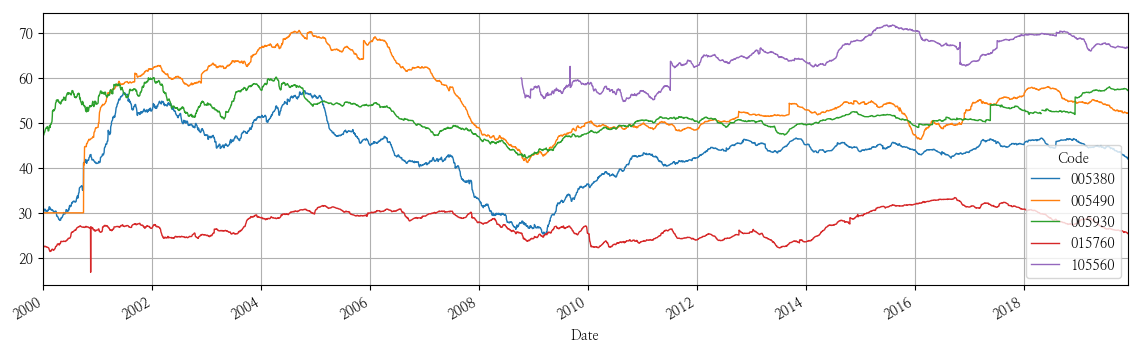

In [38]:
pivoted.plot()

KB금융그룹의 경우 2008-10-10 에 상장했기 때문에 중간부터 차트가 그려집니다.

종목코드로 그려지니 종목을 구분하기 어렵네요. 컬럼 이름을 바꾸어 줍니다.

In [39]:
fav_stocks

{'005930': '삼성전자',
 '005380': '현대차',
 '015760': '한국전력',
 '005490': 'POSCO',
 '105560': 'KB금융'}

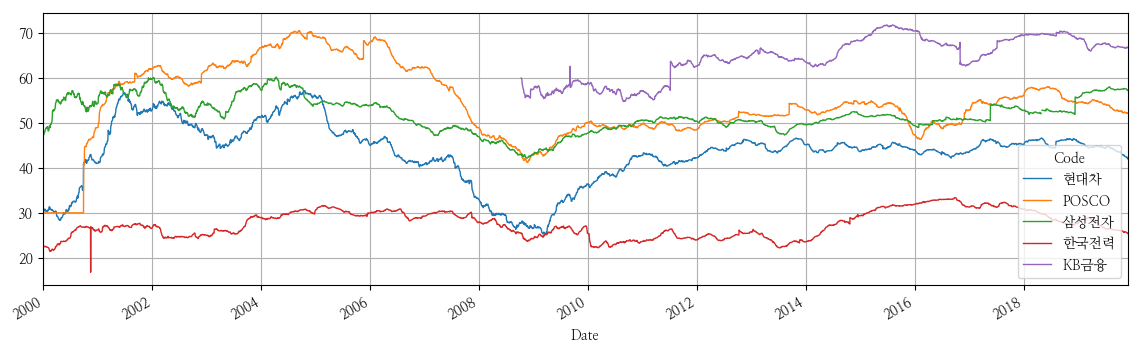

In [40]:
pivoted.rename(columns=fav_stocks, inplace=True)
pivoted.plot()

## 시가총액 비중의 변화 살펴보기

시가총액은 말그대로 기업의 규모 자체 입니다. 시장 전체에서 차지하는 시가총액의 비중을 살펴본다면 기업이 우리나라 산업 전체에서 차지하는 비중을 살펴볼 수 있다는 뜻이 되죠. 

조금 더 넓은 기간에 걸쳐 기업의 시가총액 비중을 살펴보는 것으로 특정 기업의 성장과 쇠퇴를 살펴볼 수 있습니다.

2001-06-11 이전과 이후의 "시가총액 비중" 산출식이 달라 2001-06-11 부터 사용합니다.

In [41]:
df_stocks = df_marcap[df_marcap['Code'].isin(fav_stocks.keys())]

marcap_ratio = df_stocks.pivot_table(index='Date', columns='Code', values='MarcapRatio')
marcap_ratio = marcap_ratio['2001-06-11':]
marcap_ratio.rename(columns=fav_stocks, inplace=True)
marcap_ratio.head(10)

Code        현대차  POSCO  삼성전자  한국전력  KB금융
Date                                    
2001-06-11  2.2    3.6  12.4   5.7   nan
2001-06-12  2.2    3.6  12.3   5.7   nan
2001-06-13  2.1    3.6  12.3   5.7   nan
2001-06-14  2.1    3.6  12.1   5.7   nan
2001-06-15  2.2    3.7  11.9   5.7   nan
2001-06-18  2.2    3.7  11.8   5.6   nan
2001-06-19  2.4    3.8  11.9   5.5   nan
2001-06-20  2.5    3.7  11.8   5.6   nan
2001-06-21  2.5    3.7  11.7   5.5   nan
2001-06-22  2.4    3.8  11.4   5.5   nan

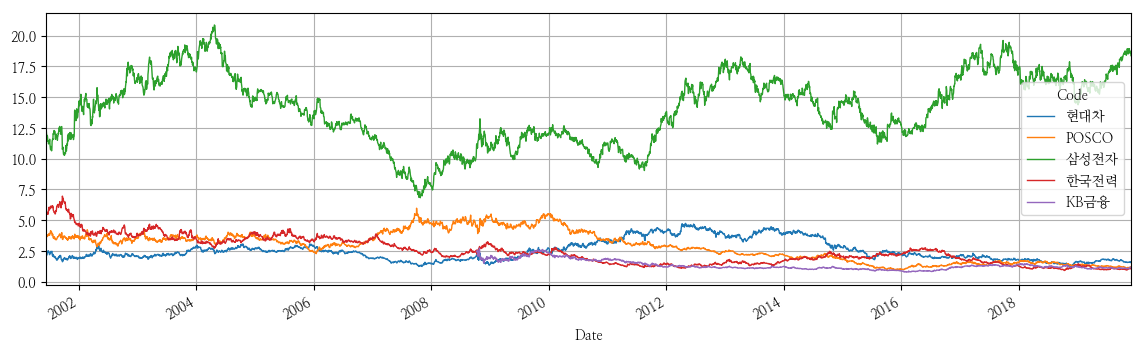

In [42]:
marcap_ratio.plot()

삼성전자가 다른 종목들에 비해 크게 나오기 때문에 나머지 종목간에 비교가 쉽지 않습니다.

컬럼을 지정하여 차트를 그립니다. 여기서는 '삼성전자'를 제외한 나머지 종목들 ['현대차', 'POSCO', '한국전력', 'KB금융']을 지정하려 차트로 그립니다.

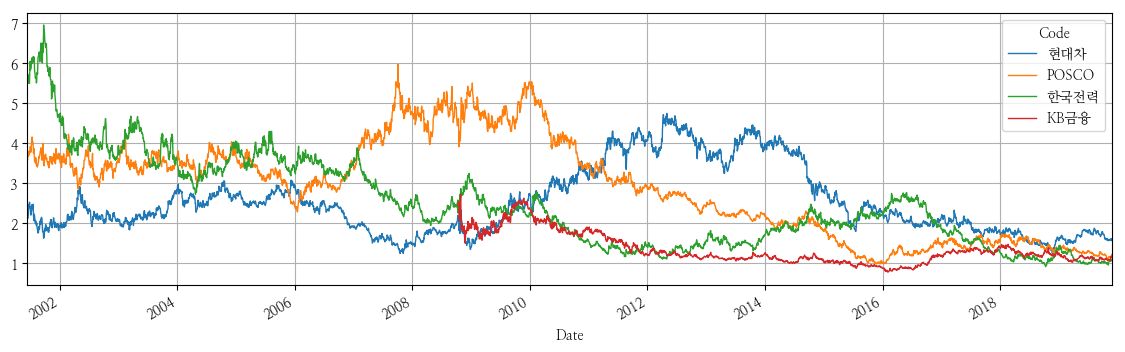

In [43]:
cols = ['현대차', 'POSCO', '한국전력', 'KB금융']
marcap_ratio[cols].plot()

2010년 이후 한국전력의 시총이 지속적으로 줄어들고 있다는 점과, 2010~2012년 동안 다른 종목들의 시총과 달리 현대차의 시총이 지속적으로 늘어나는 점이 눈에 띕니다.

2002년~2013년까지 현대차와 POSCO가 역상관을 보여주는 것도 흥미롭습니다.



시가총액 비중 데이터에 대한 간략한 통계량을 다음과 같이 산출할 수 있습니다.



In [44]:
marcap_ratio.describe()

Code     현대차  POSCO   삼성전자   한국전력   KB금융
count 4566.0 4566.0 4563.0 4566.0 2754.0
mean     2.5    2.9   14.1    2.5    1.4
std      0.8    1.2    2.8    1.1    0.4
min      1.2    1.0    6.8    0.9    0.8
25%      1.9    1.7   11.9    1.5    1.1
50%      2.3    3.0   14.4    2.3    1.2
75%      2.9    3.7   16.3    3.3    1.5
max      4.8    6.0   20.9    7.0    2.7

삼성전자의 2001년 이후 6.8% ~ 20.8% (평균 13.9%)의 시가총액 비중을 유지하고 있습니다. 

시가총액 비중 데이터의 표준편차(std)값이 가장 큰 종목이 `삼성전자`, 가장 작은 종목이 `KB금융` 입니다. 즉, 시가총액 비중의 변화가 '삼성전자'가 가장 컸고, 'KB금융'이 가장 작았다는 것을 알 수 있죠.

## 수정주가(Adjust Price)

수정주가(Adjust Price)란 총 발행 주식수의 변화를 반영한 가격을 말합니다. 액면분할, 액면병합, 유상증자, 무상증자와 같이 총 발행주식수의 변화가 발생하면 가격의 변화가 생깁니다. 예를 들어, 어떤 회사가 액면분할을 통해 1주를 2개로 쪼갠다고 하면, 주식수를 2배로 늘어나고 주식의 가격은 1/2로 낮아지며 시가총액은 동일하게 유지 됩니다.

실제 예를 들어보죠.

2018년 5월 4일, 삼성전자는 50:1로 액면분할을 합니다. 1주가 50주로 쪼개지는 것이죠. 이때 5000원인 삼성전자 주식 액면가는 액면분할 후 100원이 되었습니다. 액면분할 전에 주당 265만원(4월30일 기준)에서 5만3천원이 되었습니다.

이 가격 데이터를 그대로 사용한다면 주가가 하루만에 1/50로 다시말해 -98% 하락한 것이 됩니다.

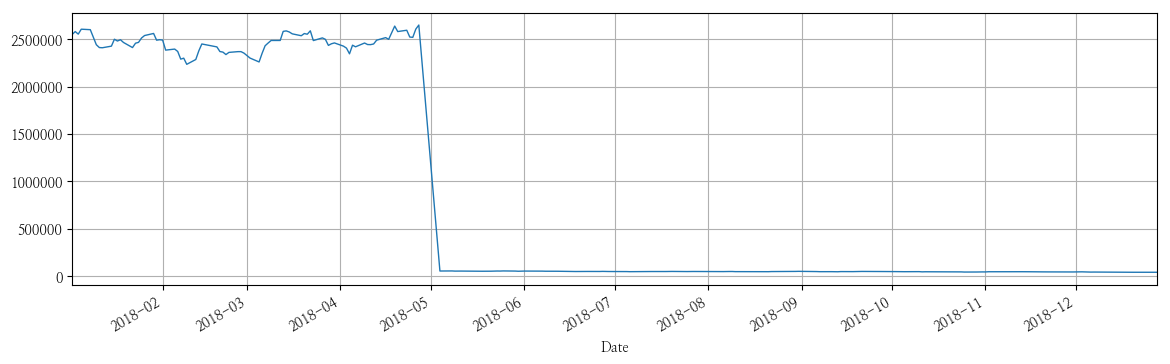

In [45]:
code = '005930' # 삼성전자(005930)
df_stock = marcap_date_range('2018-01-01', '2018-12-31', code)

df_stock['Close'].plot()

백테스트를 하기 위해서는 주식 가격 데이터의 연속성이 보장되어야 합니다. 삼성전자가 5월 4일에 -98% 하락한 것으로 계산하면 안되겠죠. 

발행 주식수가 변화하는 이벤트가 있는 경우 반드시 주식수를 변화를 함께 고려해야 합니다. 발행주식수의 변화를 반영한 가격을 수정주가(Adjusted Closing Price)라고 합니다. 백테스트를 위해서는 꼭 수정주가를 사용해야 합니다.

In [46]:
df_stock['2018-04-25':'2018-05-09']

Code  Name     Close  Changes  ChagesRatio     Volume  \
Date                                                                  
2018-04-25  005930  삼성전자 2520000.0  -3000.0         -0.1   332292.0   
2018-04-26  005930  삼성전자 2607000.0  87000.0          3.4   360931.0   
2018-04-27  005930  삼성전자 2650000.0  43000.0          1.6   606216.0   
2018-05-04  005930  삼성전자   51900.0  -1100.0         -2.1 39565391.0   
2018-05-08  005930  삼성전자   52600.0    700.0          1.4 23104720.0   
2018-05-09  005930  삼성전자   50900.0  -1700.0         -3.2 16128305.0   

                    Amount      Open      High       Low            Marcap  \
Date                                                                         
2018-04-25  826565905260.0 2461000.0 2525000.0 2461000.0 323533964880000.0   
2018-04-26  931526175000.0 2521000.0 2608000.0 2520000.0 334703589858000.0   
2018-04-27 1611240055340.0 2669000.0 2682000.0 2622000.0 340224209100000.0   
2018-05-04 2078017927600.0   53000.0   53900.0   51800.0 333162951930000.0   
2018-05-08 1218273031700.0   52600.0   53200.0   51900.0 337656479220000.0   
2018-05-09  831371915380.0   52600.0   52800.0   50900.0 326743627230000.0   

            MarcapRatio       Stocks  ForeignShares  ForeignRatio  Rank  
Date                                                                     
2018-04-25         16.8  128386494.0     66852354.0          52.1   1.0  
2018-04-26         17.2  128386494.0     66883763.0          52.1   1.0  
2018-04-27         17.4  128386494.0     66832577.0          52.1   1.0  
2018-05-04         17.3 6419324700.0   3388514370.0          52.8   1.0  
2018-05-08         17.6 6419324700.0   3389966037.0          52.8   1.0  
2018-05-09         17.1 6419324700.0   3388367976.0          52.8   1.0

액면분할을 위해 2018-04-30 부터 2018-05-03 까지 3일간 거래정지되고 2018-05-04 부터 액면분할된 가격으로 거래가 시작된 것을 확인할 수 있습니다. 2018-05-03일 총 주식수 128,386,494주에서 다음날 총 주식수는 6,419,324,700주 로 50배가 늘어났습니다. 즉 50:1로 액면분할을 한 것이죠.

수정가격은 보통 오늘 가격과 총 주식수를 과거 데이터에 반영하여 구합니다. 혹은 특정 테스트 범위의 가장 마지막 날의 가격과 총 주식수를 기준으로 과거 가격들을 수정합니다.

주가는 보통 종가(Close)를 기준으로 하기 때문에 수정주가로 가장 많이 쓰이는 것이 바로 수정 종가(Adjust Close Price) 입니다.

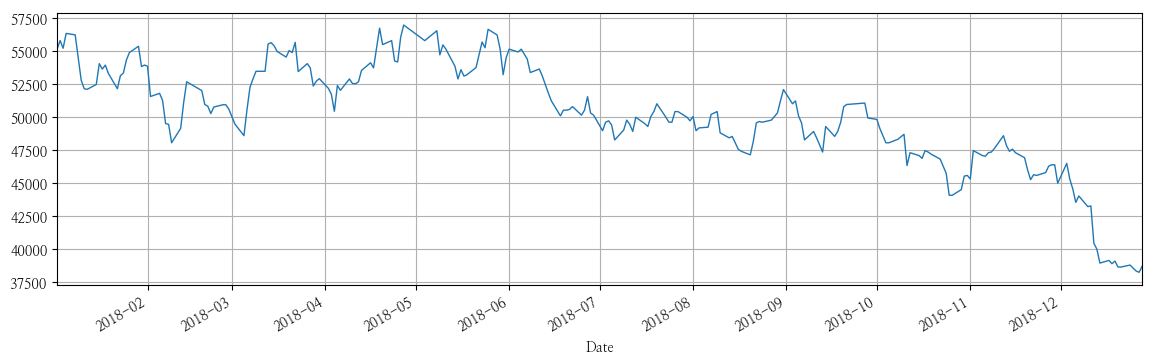

In [47]:
# 삼성전자(005930), 수정종가
code = '005930'
df_stock = marcap_date_range('2018-01-01', '2018-12-31', code)

latest_stocks = df_stock.iloc[-1]['Stocks'] # 범위 마지막날 주식수(기준)

df_stock['Adj Close'] = df_stock['Close'] * (df_stock['Stocks'] / latest_stocks) # 수정종가
df_stock['Adj Close'].plot()

다음과 같이 2018년 `종가`와 `수정 종가`를 같이 그려놓고 보면 더 확실하게 차이를 알 수 있습니다.

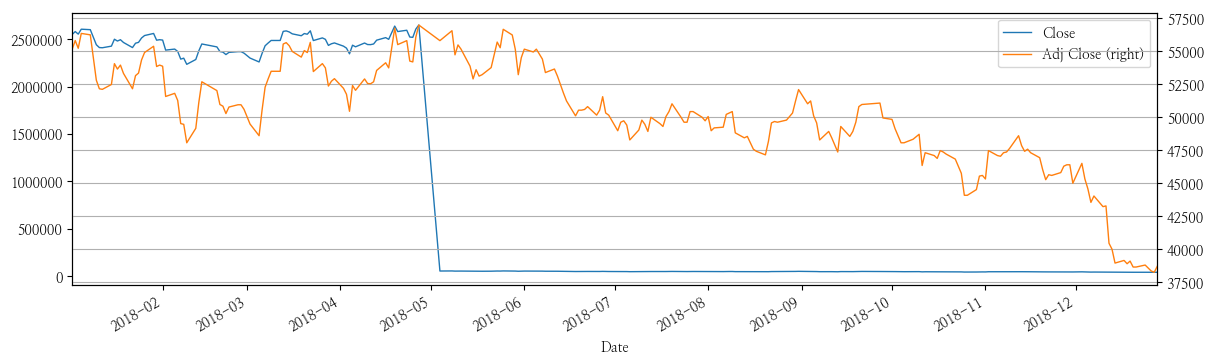

In [48]:
df_stock[['Close', 'Adj Close']].plot(secondary_y=['Adj Close'])

특정 기간동안의 수익률을 정확하게 산정하기 위해서는 `수정 종가`로 계산해야 주식 가격의 연속성을 보장받을 수 있습니다.

## 섹터 분석

[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)를 사용하면 간편하게 전체종목 코드와 섹터 데이터를 가져올 수 있습니다.


[FinanceDataReader](https://financedata.github.io/FinanceDataReader/)는 다음과 같이 설치합니다.

In [49]:
!pip install -q finance-datareader

In [50]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')
df_master.head(10)

Symbol     Name         Sector  \
0  155660      DSR    1차 비철금속 제조업   
1  001250    GS글로벌      상품 종합 도매업   
2  082740    HSD엔진  일반 목적용 기계 제조업   
3  011070    LG이노텍       전자부품 제조업   
4  010060      OCI    기초 화학물질 제조업   
5  064960   S&T모티브  자동차 신품 부품 제조업   
6  001740   SK네트웍스      기타 전문 도매업   
7  096770  SK이노베이션     석유 정제품 제조업   
8  011810      STX      상품 종합 도매업   
9  024070   WISCOM     플라스틱제품 제조업   

                                            Industry  
0                                             합섬섬유로프  
1  수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...  
2                                     대형선박용엔진,내연발전엔진  
3                                        기타 전자부품 제조업  
4   타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매  
5  자동차부품(서스펜션모듈,전장품,속옵서버,에어백,트로틀바디,너클),방산품(총포) 제조,도매  
6  종합무역업(전자전기제품,섬유,에너지화학제품,철강금속제품),의류,수입산합판,MDF판매...  
7  석유정제,석유화학제품,윤활유제품,아스팔트제품,의약중간체 제조,판매,유전개발,대체에너지사업  
8                       에너지 원료(석탄,석유),산업기자재(기계부품) 도매  
9                 플라스틱제품(PVC컴파운드,ABS,PS가공) 제조,도매,임가공

In [51]:
len(df_master)

2341

이 중에서 종목코드(Symbol)와 섹터(Sector) 데이터만 활용하려 합니다.

In [52]:
df_master[['Symbol', 'Sector']].head(10)

Symbol         Sector
0  155660    1차 비철금속 제조업
1  001250      상품 종합 도매업
2  082740  일반 목적용 기계 제조업
3  011070       전자부품 제조업
4  010060    기초 화학물질 제조업
5  064960  자동차 신품 부품 제조업
6  001740      기타 전문 도매업
7  096770     석유 정제품 제조업
8  011810      상품 종합 도매업
9  024070     플라스틱제품 제조업

특정한 일자의 시가총액 데이터를 가져옵니다.

In [53]:
# 시가총액 데이터 2019-04-30
df_marcap = marcap_date('2019-04-30')

df_marcap[['Code', 'Name', 'Marcap']].head(10)

Code      Name            Marcap
Date                                          
2019-04-30  005930      삼성전자 273714529917500.0
2019-04-30  000660    SK하이닉스  57512186835000.0
2019-04-30  005935     삼성전자우  30611385240000.0
2019-04-30  005380       현대차  29593043899500.0
2019-04-30  068270      셀트리온  27126139668000.0
2019-04-30  051910      LG화학  25483835823000.0
2019-04-30  012330     현대모비스  22632448147500.0
2019-04-30  207940  삼성바이오로직스  22496100000000.0
2019-04-30  005490     POSCO  22232642925000.0
2019-04-30  051900    LG생활건강  22209076134000.0

다음 두 데이터를 종목코드를 기준으로 병합합니다.

* 전체종목코드(df_master): 종목코드(Symbol), 섹터(Sector)
* 시가총액 데이터(df_marcap): 종목코드(Code), 종목명(Name), 시가총액(Marcap)


In [54]:
df_merge = pd.merge(df_marcap[['Code', 'Name', 'Marcap']], df_master[['Symbol', 'Sector']], left_on='Code', right_on="Symbol")

print('row count:', len(df_merge))
df_merge.head(10)

row count: 2151


Code      Name            Marcap  Symbol                 Sector
0  005930      삼성전자 273714529917500.0  005930         통신 및 방송 장비 제조업
1  000660    SK하이닉스  57512186835000.0  000660                반도체 제조업
2  005380       현대차  29593043899500.0  005380      자동차용 엔진 및 자동차 제조업
3  068270      셀트리온  27126139668000.0  068270  기초 의약물질 및 생물학적 제제 제조업
4  051910      LG화학  25483835823000.0  051910            기초 화학물질 제조업
5  012330     현대모비스  22632448147500.0  012330          자동차 신품 부품 제조업
6  207940  삼성바이오로직스  22496100000000.0  207940  기초 의약물질 및 생물학적 제제 제조업
7  005490     POSCO  22232642925000.0  005490              1차 철강 제조업
8  051900    LG생활건강  22209076134000.0  051900            기타 화학제품 제조업
9  055550      신한지주  20912201786700.0  055550                 기타 금융업

섹터별 종목수 TOP 10을 산출합니다.

In [55]:
df_sector_counts = df_merge['Sector'].value_counts()[:10]
df_sector_counts

특수 목적용 기계 제조업     123
소프트웨어 개발 및 공급업    117
전자부품 제조업          109
자동차 신품 부품 제조업      91
의약품 제조업            85
기타 금융업             84
기타 화학제품 제조업        76
통신 및 방송 장비 제조업     66
금융 지원 서비스업         57
1차 철강 제조업          56
Name: Sector, dtype: int64

종목수 기준으로 가장 많은 종목은 '특수 목적용 기계 제조업', '소프트웨어 개발 및 공급업', '전자부품 제조업' 순이네요.

섹터별 종목수 TOP 10을 파이차트로 표현해 봅니다. 특정 날짜(2019-04-30)의 섹터별 종목수 현황은 다음과 같습니다.



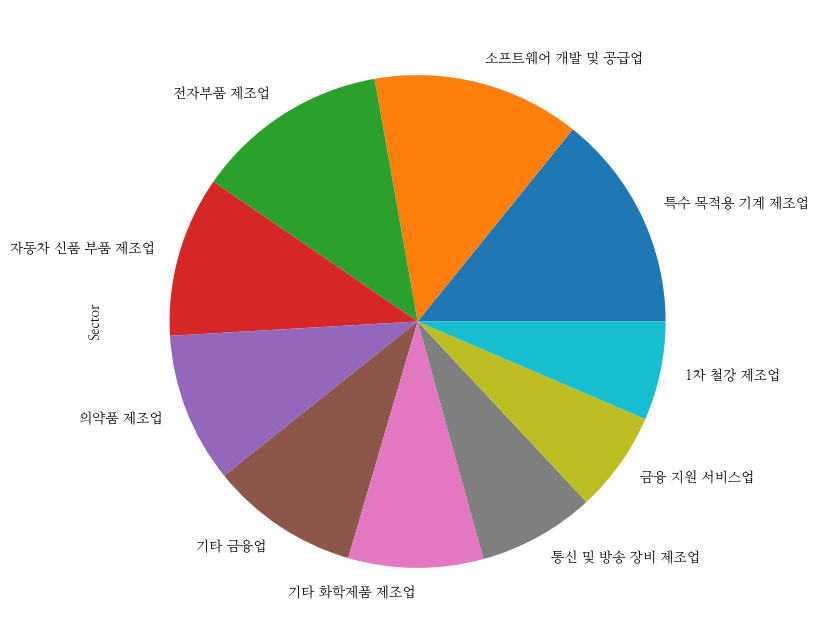

In [56]:
df_sector_counts.plot.pie(figsize=(8, 8))

## 섹터별 시가총액

섹터별 시가총액을 구해봅니다.

In [57]:
df_merge.head()

Code    Name            Marcap  Symbol                 Sector
0  005930    삼성전자 273714529917500.0  005930         통신 및 방송 장비 제조업
1  000660  SK하이닉스  57512186835000.0  000660                반도체 제조업
2  005380     현대차  29593043899500.0  005380      자동차용 엔진 및 자동차 제조업
3  068270    셀트리온  27126139668000.0  068270  기초 의약물질 및 생물학적 제제 제조업
4  051910    LG화학  25483835823000.0  051910            기초 화학물질 제조업

데이터를 섹터별로 묶어서(groupby) 덧셈(sum)을 하면 섹터별 시가총액을 구할 수 있습니다.

In [58]:
df_merge.groupby('Sector').sum().head()

Marcap
Sector                            
1차 비철금속 제조업       12133410422770.0
1차 철강 제조업         36799091448605.0
가구 제조업             1470724563595.0
가전제품 및 정보통신장비 소매업  1122546705600.0
가정용 기기 제조업         1680620800805.0

그리고, Marcap(시가총액) 역순으로 소트하여 처음 TOP 20개 섹터를 산출합니다

In [59]:
df_sector_corp_marcap = df_merge.groupby('Sector').sum().sort_values('Marcap', ascending=False)[:20]
df_sector_corp_marcap

Marcap
Sector                                            
통신 및 방송 장비 제조업                   294775816525000.0
기타 금융업                           150082284687830.0
기초 의약물질 및 생물학적 제제 제조업             67881496297080.0
반도체 제조업                           66200298251616.0
기타 화학제품 제조업                       65045867524026.0
기초 화학물질 제조업                       55218540858285.0
보험업                               51676313235625.0
자동차용 엔진 및 자동차 제조업                 48938331363725.0
소프트웨어 개발 및 공급업                    44862753476577.0
의약품 제조업                           42137688451202.0
1차 철강 제조업                         36799091448605.0
기타 전문 도매업                         36569601785346.0
전자부품 제조업                          36485524861012.0
자동차 신품 부품 제조업                     35757300433650.0
전기 통신업                            35124036766780.0
석유 정제품 제조업                        33558063384441.0
자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업  32883474927580.0
종합 소매업                            25064605473840.0
선박 및 보트 건조업                       23283569101650.0
컴퓨터 프로그래밍, 시스템 통합 및 관리업           22762276844255.0

가로 막대차트로 표현하면 훨씬 더 잘 확인할 수 있죠.

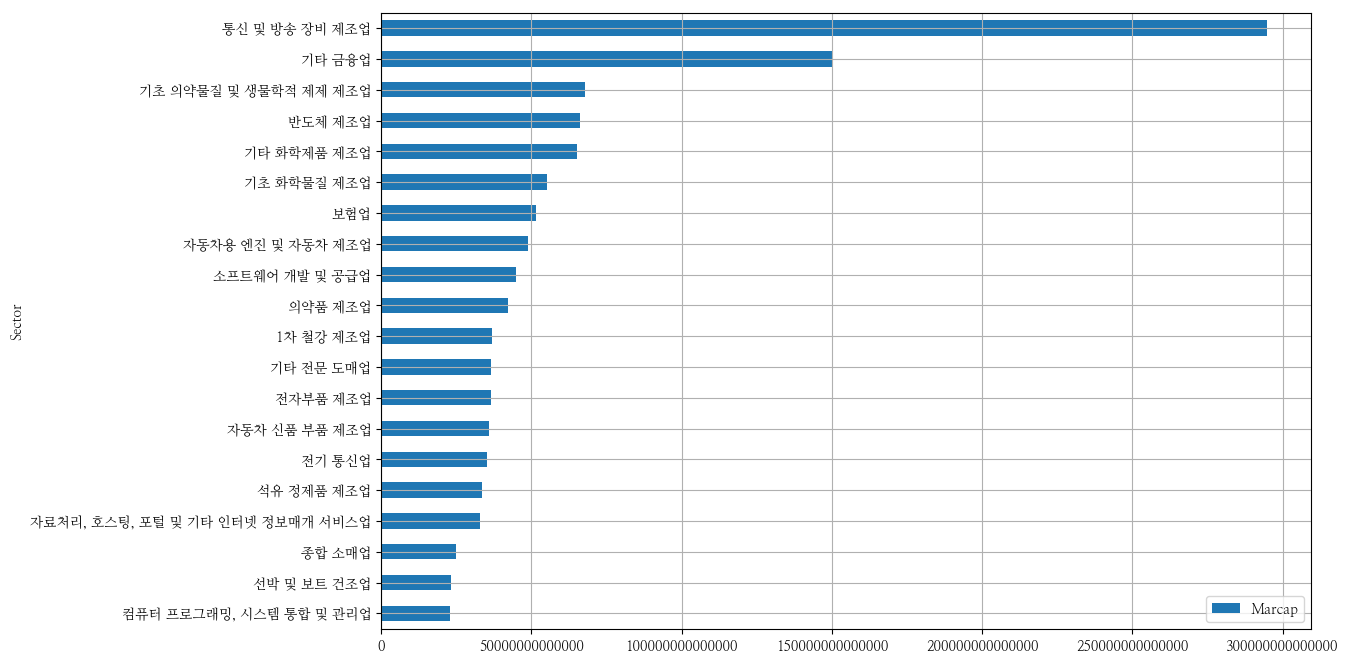

In [60]:
df_sector_corp_marcap[::-1].plot(kind='barh', figsize=(12, 8))

## 컬럼의 금액 단위 바꾸기

시가총액은 단위가 너무 커서 읽기가 어렵습니다. 좀 더 쉽게 보기 위해 조 단위로 바꾸어 봅니다.

In [61]:
df = marcap_date('2019-05-10')

df['Marcap_trillion'] = df['Marcap'] / 1e12 # 원 단위에서 조(10^12) 단위로 변경
df.head()

Code    Name     Open     High      Low    Close     Volume  \
Date                                                                        
2019-05-10  005930    삼성전자  42600.0  43450.0  42450.0  42900.0 14579512.0   
2019-05-10  000660  SK하이닉스  76100.0  76700.0  73400.0  74400.0  5702537.0   
2019-05-10  005935   삼성전자우  34650.0  35150.0  34400.0  35100.0  1979112.0   
2019-05-10  005380     현대차 131500.0 134000.0 128000.0 130000.0   544413.0   
2019-05-10  068270    셀트리온 209000.0 209000.0 198500.0 201500.0   698530.0   

                   Amount  Changes  ChagesRatio            Marcap  \
Date                                                                
2019-05-10 624673461000.0    450.0          1.1 256103671395000.0   
2019-05-10 427347721031.0  -1600.0         -2.1  54163375956000.0   
2019-05-10  68955034400.0    400.0          1.2  28883323170000.0   
2019-05-10  70936538000.0  -1000.0         -0.8  27776864310000.0   
2019-05-10 141553272500.0  -8500.0         -4.0  25782628033500.0   

                 Stocks  MarcapRatio  ForeignShares  ForeignRatio  Rank  \
Date                                                                      
2019-05-10 5969782550.0         15.5   3415190679.0          57.2   1.0   
2019-05-10  728002365.0          3.3    373475397.0          51.3   2.0   
2019-05-10  822886700.0          1.8    761766243.0          92.6   3.0   
2019-05-10  213668187.0          1.7     95988858.0          44.9   4.0   
2019-05-10  127953489.0          1.6     25633167.0          20.0   5.0   

            Marcap_trillion  
Date                         
2019-05-10            256.1  
2019-05-10             54.2  
2019-05-10             28.9  
2019-05-10             27.8  
2019-05-10             25.8

개별 종목의 시가총액  df\['Marcap'\]을 10^12으로 나누어 조 단위로 변경하여 df\['Marcap_trillion'\]  컬럼을 추가하였습니다.

In [62]:
df['Marcap_trillion'].sum()  # 시가총액 전체 (조단위)

1645.7527997506015

시가총액 컬럼 df['Marcap_trillion']을 모두 더하면, 한국 주식시장 시가총액은 약 1,645.7 조원 입니다. (2019년 5월 10일 기준) 

시가총액 비중 df['MarcapRatio'] 의 합은 얼마일까? 

In [63]:
df['MarcapRatio'].sum()

98.55999999999999

당연히 100(%)이 되어야 하겠지만 100보다 약간 작은 숫자가 됩니다.

시가총액 비중의 합이 100이 안되는 이유는 대부분의 종목들이 너무 작은 비중을 차지하기 때문이다.
한국 주식시장에서 시가총액 비중이 0.01% 이 넘으려면 대략 1,200등 안에는 들어야 합니다. 다시 말해, 전체 종목(2133개)의 대략 절반 정도는 시가총액 비중이 0.01% 가 안된다는 의미이기도 한 것이죠.

## 결론
시가총액(marcap) 데이터셋 뿐만 아니라 24년간 개별 종목의 가격, 외국인 지분율 등 다양한 데이터를 포함하고 있습니다. 뿐만 아니라 발행 주식수가 데이터에 포함되어 있으므로 수정주가(Adjust Price)을 산출할 수 있습니다.

특정 분야의 종목의 시총을 일자별로 합산하면 특정 영역의 혹은 특정 산업의 트렌드를 분석하는데도 요긴하게 사용할 수 있으며, 산업의 규모나 트렌드 분석을 위한 좋은 데이터셋 입니다.

주피터 노트북(혹은 구글 Colab)을 통해 간편하게 데이터를 가져와 다양한 분석을 해볼 수 있도록 정리하였으며 관심있는 분들에게 도움이 되시길 바랍니다.

#### 2018-2019 [FinanceData.KR]()